# Autism Sprectrum Disorder

## Data

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train=pd.read_csv(r"train.csv")
test=pd.read_csv(r"test.csv")

In [ ]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
train.isna().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


# visualization

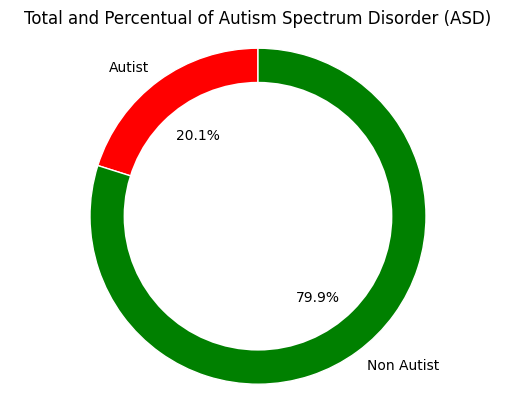

In [ ]:
autism_map = {1: 'Autist', 0: 'Non Autist'}
autism_colors = ['red', 'green']

total_count = len(train)
autist_count = train['Class/ASD'].sum()
non_autist_count = total_count - autist_count

autist_percent = autist_count / total_count * 100
non_autist_percent = non_autist_count / total_count * 100

fig, ax = plt.subplots()

ax.pie([autist_percent, non_autist_percent], labels=[f'Autist', f'Non Autist'],
       autopct='%1.1f%%', startangle=90, colors=autism_colors, wedgeprops=dict(width=.4, edgecolor='w'))

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()


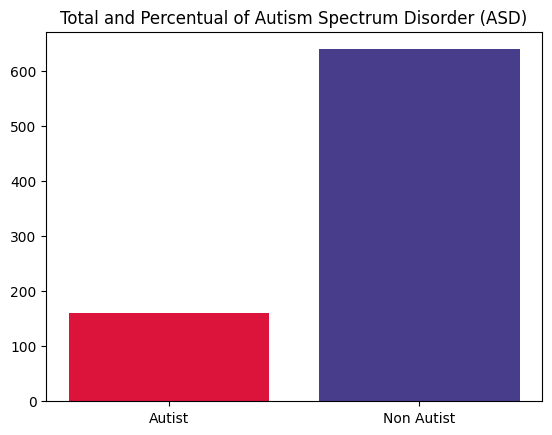

In [ ]:
autist_count = train['Class/ASD'].sum()
non_autist_count = len(train) - autist_count

fig, ax = plt.subplots()

ax.bar(['Autist', 'Non Autist'], [autist_count, non_autist_count], color=['crimson', 'darkslateblue'])

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()


In [ ]:
train["ethnicity"].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


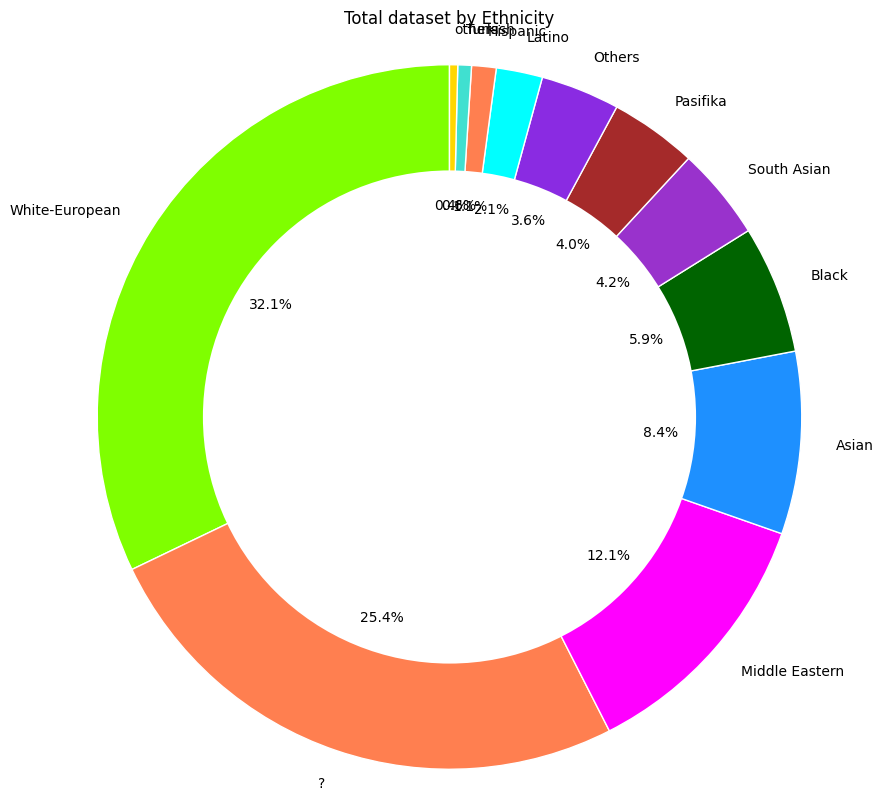

In [ ]:
# Define colors for each ethnicity
ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid', 'brown', 'BlueViolet', 'cyan', 'coral', 'Turquoise', 'Gold']

# Plotting the donut chart for ethnicity
fig, ax = plt.subplots(figsize=(10, 10))

# Extract ethnicity counts from the DataFrame
ethnicity_counts = train['ethnicity'].value_counts()

# Draw the donut chart
ax.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=90,
       colors=ethnicity_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Total dataset by Ethnicity')
plt.show()


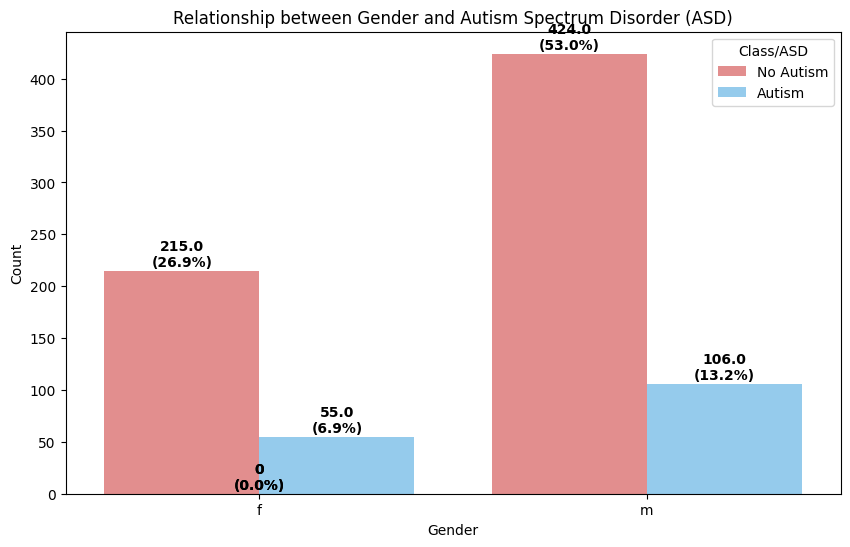

In [ ]:
# Define colors for each class
class_colors = {0: 'lightskyblue', 1: 'lightcoral'}


# Plotting the relationship between Gender and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue="Class/ASD", data=train, palette=set(class_colors.values()))

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Autism Spectrum Disorder (ASD)')


# Display the plot
plt.show()


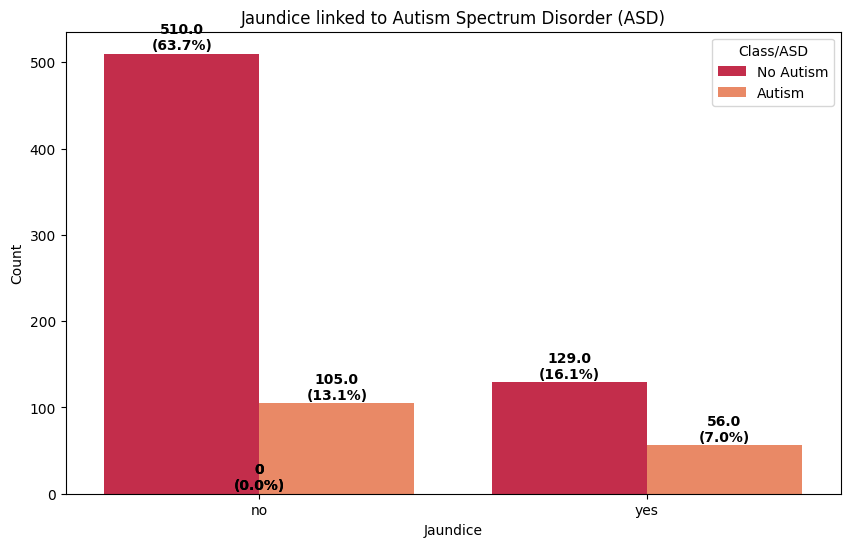

In [ ]:
# Define colors for each class
jaundice_colors = ['crimson', 'coral']
jaundice_map = {'yes': 'Jaundice', 'no': 'No Jaundice'}

# Plotting the relationship between Jaundice and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='jaundice', hue='Class/ASD', data=train, palette=jaundice_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Jaundice linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


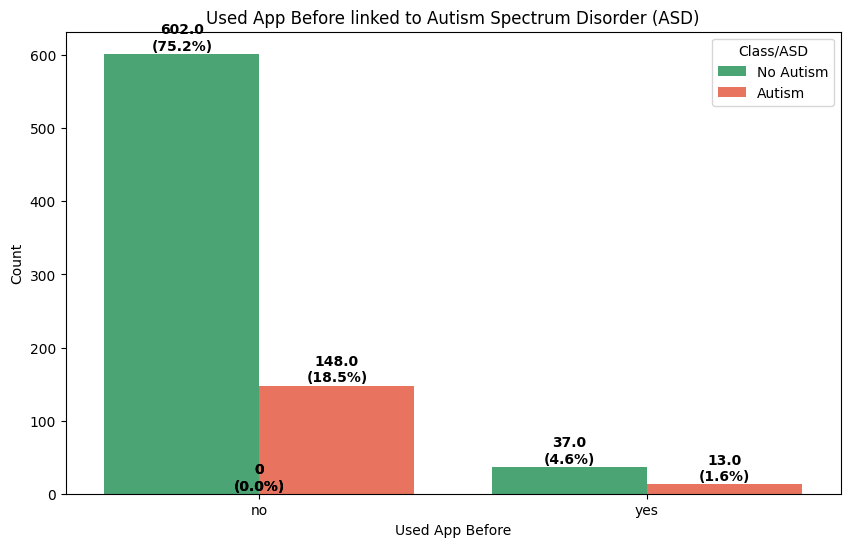

In [ ]:
# Define colors for each class
used_app_colors = ['mediumseagreen', 'tomato']
used_app_map = {'yes': 'Used App Before', 'no': 'No App Usage'}

# Plotting the relationship between Used App Before and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='used_app_before', hue='Class/ASD', data=train, palette=used_app_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Used App Before')
plt.ylabel('Count')
plt.title('Used App Before linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


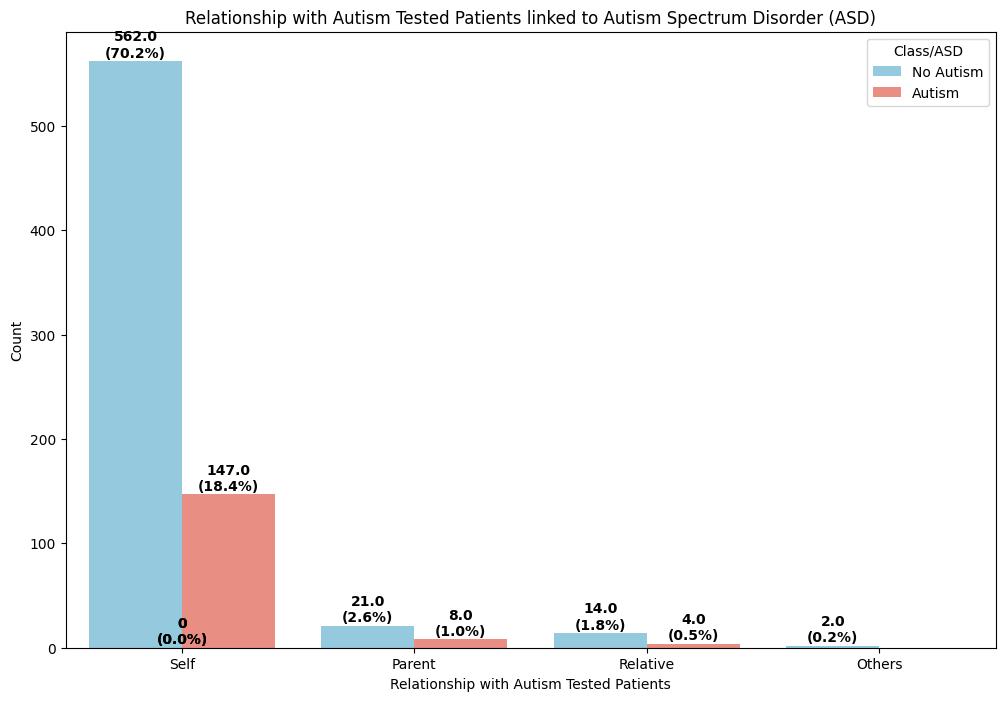

In [ ]:
# Define colors for each class
relation_colors = ['skyblue', 'salmon']
relation_map = {'Self': 'Self', 'Parent': 'Parent', 'Relative': 'Relative', 'Others': 'Others'}

# Plotting the relationship with Autism Tested Patients and Class/ASD
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='relation', hue='Class/ASD', data=train, palette=relation_colors, order=['Self', 'Parent', 'Relative', 'Others'])

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Relationship with Autism Tested Patients')
plt.ylabel('Count')
plt.title('Relationship with Autism Tested Patients linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


##  Plotting the relationship between age distribution and Class/ASD

<Figure size 1200x800 with 0 Axes>

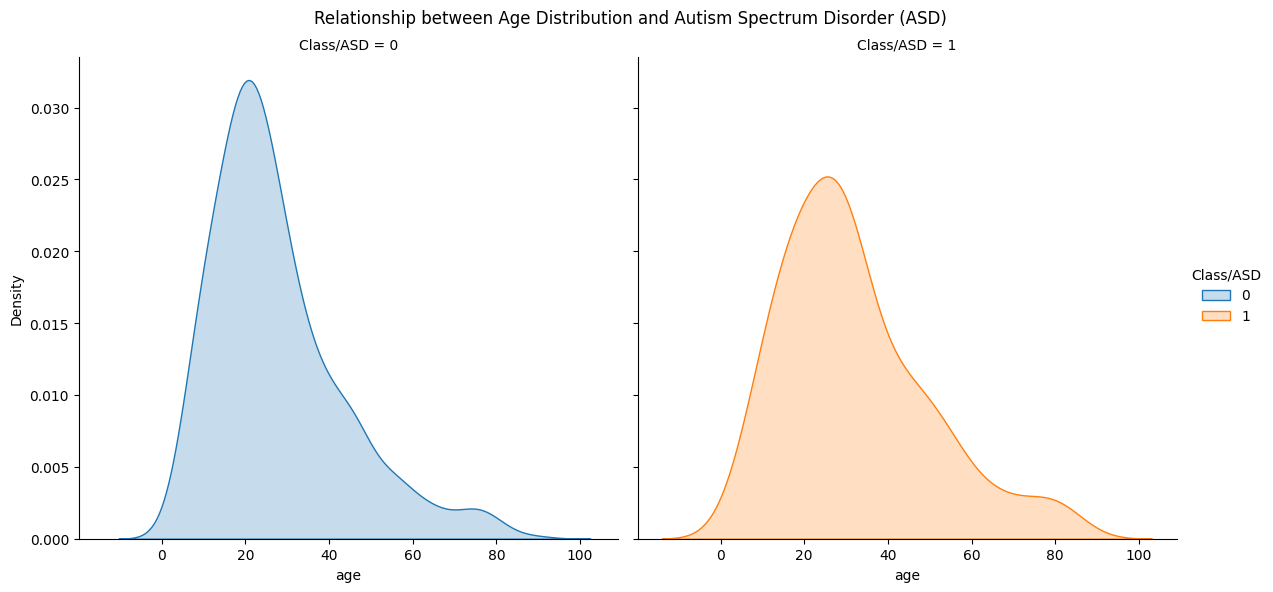

In [ ]:
# Plotting the relationship between age distribution and Class/ASD
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(train, col='Class/ASD', hue='Class/ASD', height=6)
g.map(sns.kdeplot, 'age', fill=True)
g.add_legend()

# Setting labels and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age Distribution and Autism Spectrum Disorder (ASD)')

# Display the plot
plt.show()


## Magnified Distribution

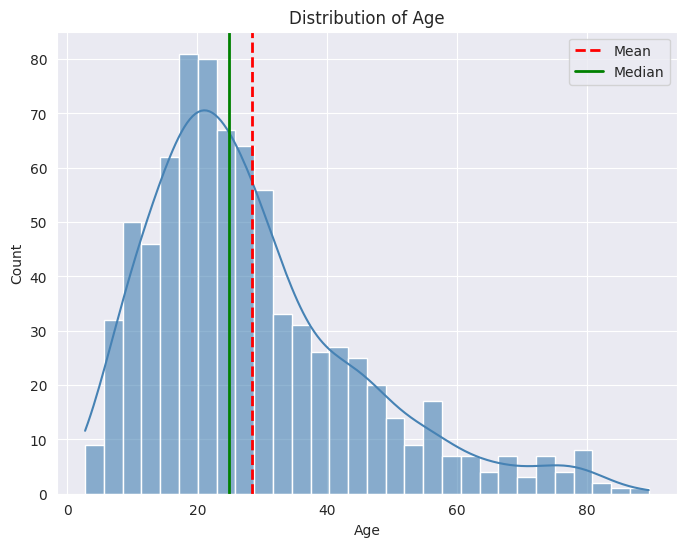

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'autism.csv' with your actual file)
df = pd.read_csv("train.csv")

# Set style
sns.set_style("darkgrid")

# Compute mean and median
mean_age = df["age"].mean()
median_age = df["age"].median()

# Plot histogram with density curve
plt.figure(figsize=(8, 6))
sns.histplot(df["age"], bins=30, kde=True, color="steelblue", alpha=0.6)

# Add vertical lines for mean and median
plt.axvline(mean_age, color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(median_age, color="green", linestyle="solid", linewidth=2, label="Median")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")

# Add legend
plt.legend()

# Show plot
plt.show()


# Preprocessing

### 1.Data dosen't have a null value

### 2.Data Encoding

In [ ]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
cat = {'ethnicity':'category',
       'gender':'category',
       'jaundice':'category',
       'austim':'category',
       'contry_of_res':'category',
       'used_app_before':'category',
        'age_desc':'category',
        'relation':'category'}
test = test.astype(cat)
train = train.astype(cat)

In [ ]:
cat_columns = ['ethnicity', 'gender', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in cat_columns:
    train[col] = train[col].cat.codes
    test[col] = test[col].cat.codes


In [ ]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,7,0,6.351166,0,5,0
1,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,25,0,2.255185,0,5,0
2,3,1,1,1,1,1,1,1,1,1,...,1,10,0,1,54,0,14.851484,0,5,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,54,0,2.276617,0,5,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,46,0,-4.777286,0,5,0


In [ ]:
print(train.dtypes)

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender                int8
ethnicity             int8
jaundice              int8
austim                int8
contry_of_res         int8
used_app_before       int8
result             float64
age_desc              int8
relation              int8
Class/ASD            int64
dtype: object


### 3.Drop unuseful data

In [ ]:
train=train.drop('ID', axis=1)
train=train.drop('relation', axis=1)

In [ ]:
test=test.drop('ID', axis=1)
test=test.drop('relation', axis=1)

### 4.Split Data

In [ ]:
X = train.drop('Class/ASD', axis=1)
y = train['Class/ASD']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.Standard Scaler


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.fit_transform(test)

# Classification

## 1.Random Forest

In [ ]:
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = classifier.predict(X_test)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_rf = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_rf)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[114  10]
 [ 15  21]]
Accuracy: 0.84375
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       124
           1       0.68      0.58      0.63        36

    accuracy                           0.84       160
   macro avg       0.78      0.75      0.76       160
weighted avg       0.84      0.84      0.84       160



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_rf,recall_rf,fscore_rf,support_rf=score(y_val, y_pred)
print(precision_rf)

[0.88372093 0.67741935]


ROC-AUC Score: 0.7455197132616488


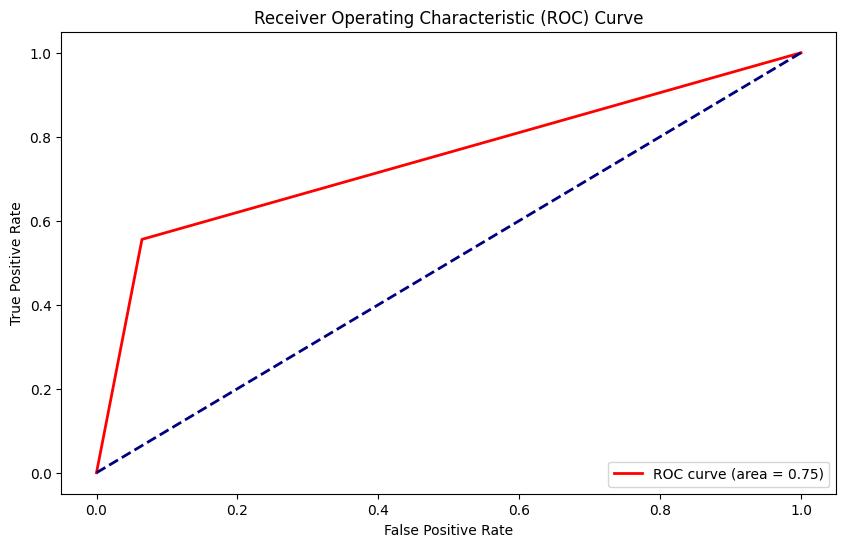

In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 2. Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(criterion="gini")

# Train the classifier on the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = dtree.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_dt = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_dt)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[107  21]
 [ 13  19]]
Accuracy: 0.7875
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       128
           1       0.47      0.59      0.53        32

    accuracy                           0.79       160
   macro avg       0.68      0.71      0.70       160
weighted avg       0.81      0.79      0.80       160



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_dt,recall_dt,fscore_dt,support_dt=score(y_val, y_pred)
print(precision_dt)

[0.89166667 0.475     ]


ROC-AUC Score: 0.707437275985663


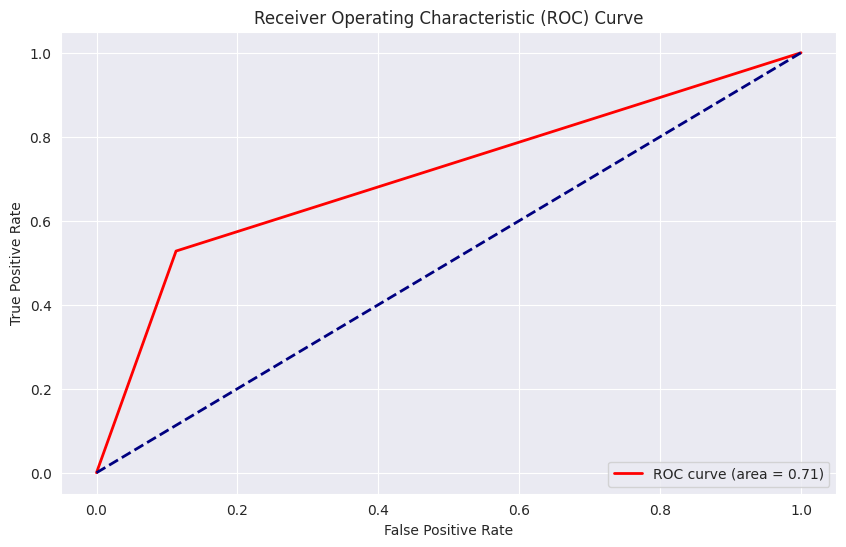

In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 3. ANN model

In [ ]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units=15, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN on the training data
classifier.fit(X_train, y_train, batch_size=32, epochs=50)

# Make predictions on the validation data
y_predict = classifier.predict(X_val)
y_predict = (y_predict > 0.5)

# We can predict for the test dataset given using below code
# y_predict = classifier.predict(X_test)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4034 - loss: 0.7860
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7550 - loss: 0.5715 
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8240 - loss: 0.4552 
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.3678 
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3617 
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8494 - loss: 0.3411 
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8480 - loss: 0.3234 
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.2828 
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8533 - loss: 0.3037 
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8578 - loss: 0.2847 
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8530 - loss: 0.2962 
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8620 - los

In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(y_val, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

accuracy_ANN = accuracy_score(y_val, y_predict)
print("Accuracy:", accuracy_ANN)

class_report = classification_report(y_val, y_predict)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[114  10]
 [ 14  22]]
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       124
           1       0.69      0.61      0.65        36

    accuracy                           0.85       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.84      0.85      0.85       160



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_ANN,recall_ANN,fscore_ANN,support_ANN=score(y_val, y_predict)
print(precision_ANN)

[0.890625 0.6875  ]


ROC-AUC Score: 0.7652329749103943


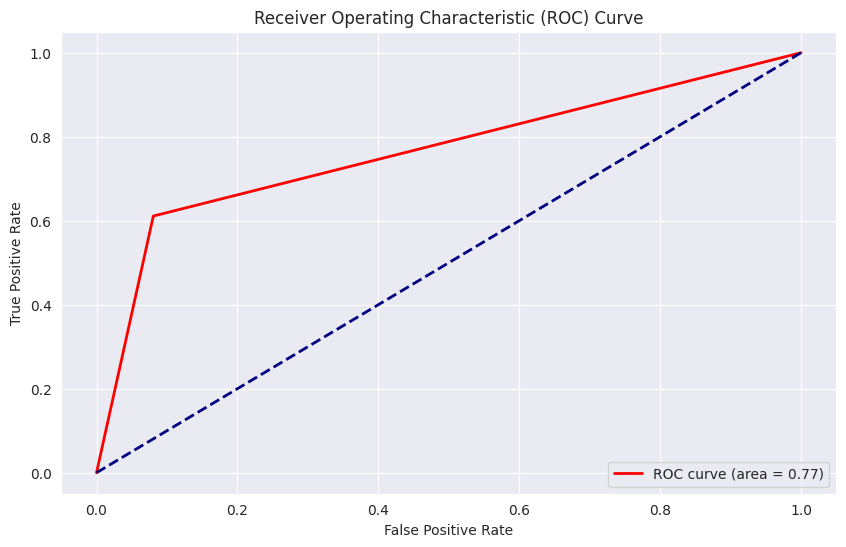

In [ ]:
roc_auc = roc_auc_score(y_val, y_predict)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_predict)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 4. SVM model

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = clf.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_svm = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_svm)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[110  14]
 [ 17  19]]
Accuracy: 0.80625
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       124
           1       0.58      0.53      0.55        36

    accuracy                           0.81       160
   macro avg       0.72      0.71      0.71       160
weighted avg       0.80      0.81      0.80       160



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_svm,recall_svm,fscore_svm,support_svm=score(y_val, y_pred)
print(precision_svm)

[0.86614173 0.57575758]


ROC-AUC Score: 0.8028673835125448


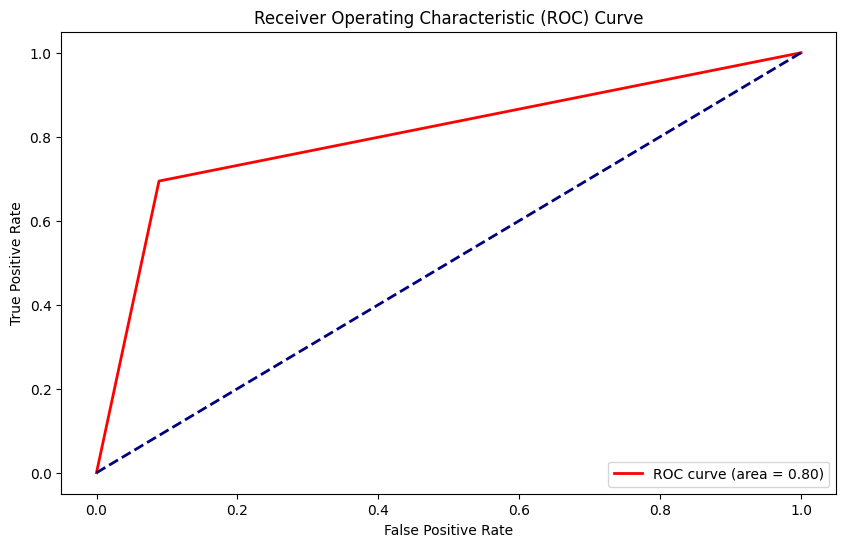

In [ ]:
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


 ## 5. Multi svm

Confusion Matrix:
[[114  10]
 [ 11  25]]
Accuracy: 0.86875
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       124
           1       0.71      0.69      0.70        36

    accuracy                           0.87       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.87      0.87      0.87       160

Precision: 0.7142857142857143
Recall: 0.6944444444444444
F1-Score: 0.704225352112676
[0.912      0.71428571]
ROC-AUC Score: 0.8068996415770608


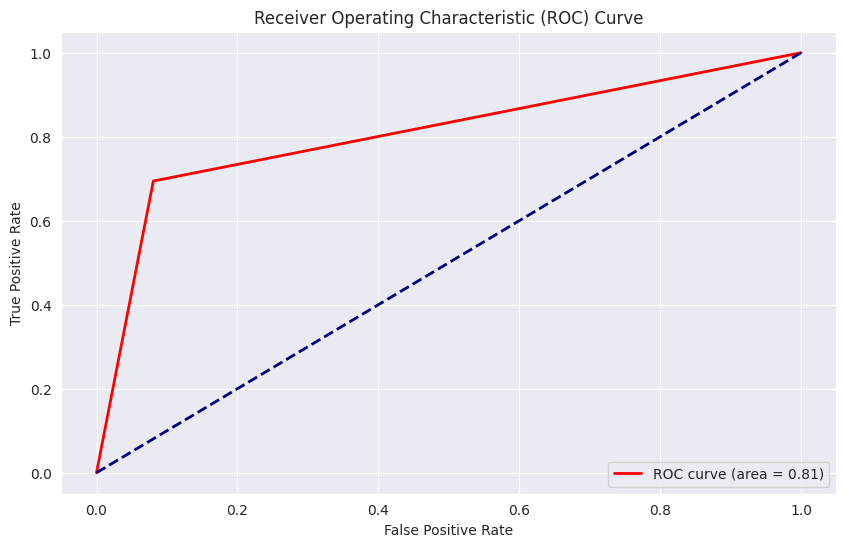

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Drop unnecessary columns
drop_cols = ["ID", "age_desc", "contry_of_res"]
train_df = train_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)

# Convert categorical variables to numerical using Label Encoding
categorical_cols = ["gender", "ethnicity", "jaundice", "austim", "used_app_before", "relation"]
encoder = LabelEncoder()

for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

# Define features (X) and target (y)
X_train = train_df.drop(columns=["Class/ASD"])
y_train = train_df["Class/ASD"]
X_test = test_df.drop(columns=["Class/ASD"])
y_test = test_df["Class/ASD"]

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Multi-SVM Classifier (One-vs-Rest)
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

# Train the model
clf.fit(X_train, y_train)

# Predict for the test dataset
y_pred = clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_msvm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_msvm)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Precision, Recall, F1-Score
precision_msvm, recall_msvm, fscore_msvm, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision_msvm)
print("Recall:", recall_msvm)
print("F1-Score:", fscore_msvm)

from sklearn.metrics import precision_recall_fscore_support as score
precision_msvm,recall_msvm,fscore_msvm,support_msvm=score(y_val, y_pred)
print(precision_msvm)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 6. Logistic Regression model

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# Convert X_train and X_val to DataFrames (if not already)
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

# Ensure both datasets have the same columns
common_columns = X_train.columns.intersection(X_val.columns)
X_train = X_train[common_columns]
X_val = X_val[common_columns]

# Check again if the feature dimensions match
if X_train.shape[1] != X_val.shape[1]:
    raise ValueError(f"Still mismatched: X_train has {X_train.shape[1]} features, X_val has {X_val.shape[1]}.")

# Handle missing values by replacing NaNs with column mean
X_train.fillna(X_train.mean(), inplace=True)
X_val.fillna(X_val.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create and train the Logistic Regression model
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = logr.predict(X_val)

print("Prediction successful!")


Prediction successful!


In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_logr = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_logr)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[118   6]
 [ 15  21]]
Accuracy: 0.86875
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       124
           1       0.78      0.58      0.67        36

    accuracy                           0.87       160
   macro avg       0.83      0.77      0.79       160
weighted avg       0.86      0.87      0.86       160



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_logr,recall_logr,fscore_logr,support_logr=score(y_val, y_pred)
print(precision_logr)

[0.88721805 0.77777778]


ROC-AUC Score: 0.76747311827957


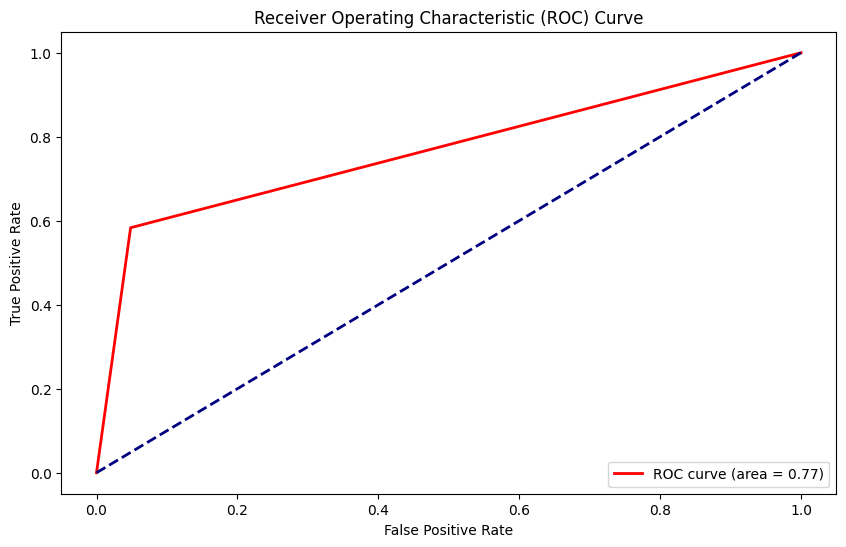

In [ ]:
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 7. Naive Bayes

In [ ]:
#Import GaussianNB model
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
gnb = GaussianNB()

# Model training
gnb.fit(X_train, y_train)

# Predict Output
y_pred = gnb.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = gnb.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_gnb = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_gnb)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[100  28]
 [ 28   4]]
Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       128
           1       0.12      0.12      0.12        32

    accuracy                           0.65       160
   macro avg       0.45      0.45      0.45       160
weighted avg       0.65      0.65      0.65       160



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_gnb,recall_gnb,fscore_gnb,support_gnb=score(y_val, y_pred)
print(precision_gnb)

[0.94545455 0.6       ]


ROC-AUC Score: 0.453125


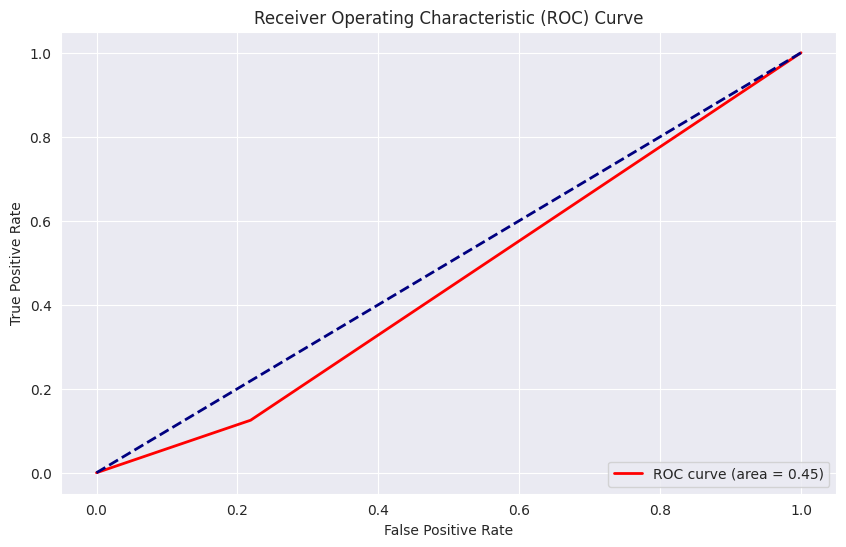

In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 8. KNN

In [ ]:
#Import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Model training
knn.fit(X_train, y_train)

# Predict Output
y_pred = knn.predict(X_val)

# We can predict for the test dataset given using below code
# y_pred = knn.predict(X_test)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_knn = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy_knn)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[100  28]
 [ 28   4]]
Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       128
           1       0.12      0.12      0.12        32

    accuracy                           0.65       160
   macro avg       0.45      0.45      0.45       160
weighted avg       0.65      0.65      0.65       160



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_knn,recall_knn,fscore_knn,support_knn=score(y_val, y_pred)
print(precision_knn)

[0.92622951 0.71052632]


ROC-AUC Score: 0.453125


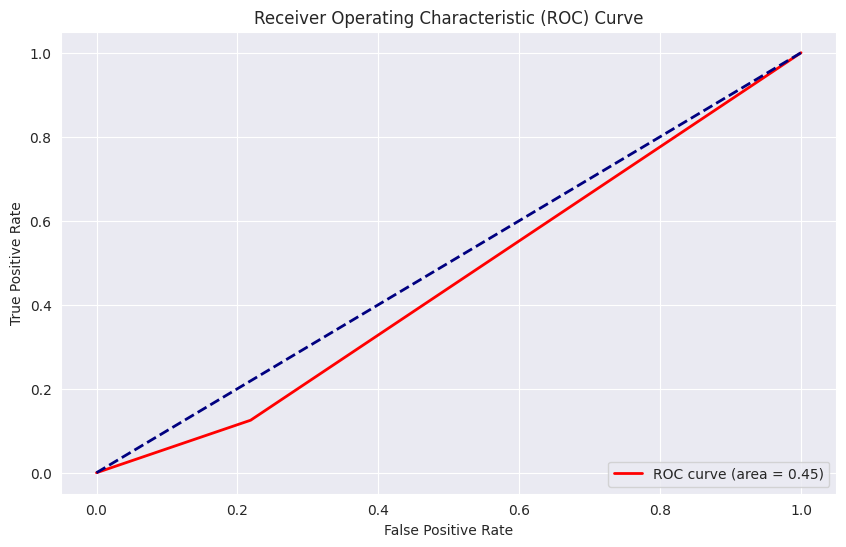

In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 9. DNN


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7288 - loss: 0.5793 - val_accuracy: 0.8250 - val_loss: 0.3566
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8570 - loss: 0.3149 - val_accuracy: 0.8313 - val_loss: 0.3175
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8639 - loss: 0.2825 - val_accuracy: 0.8375 - val_loss: 0.3167
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8791 - loss: 0.2738 - val_accuracy: 0.8250 - val_loss: 0.3216
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8886 - loss: 0.2387 - val_accuracy: 0.8375 - val_loss: 0.3223
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9004 - loss: 0.2295 - val_accuracy: 0.8500 - val_loss: 0.3230
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8917 - loss: 0.2343 - val_accuracy: 0.8438 - val_loss: 0.3310
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9145 - loss: 0.2060 - val_accuracy: 0.8313 - val_loss: 0.3465
Epo

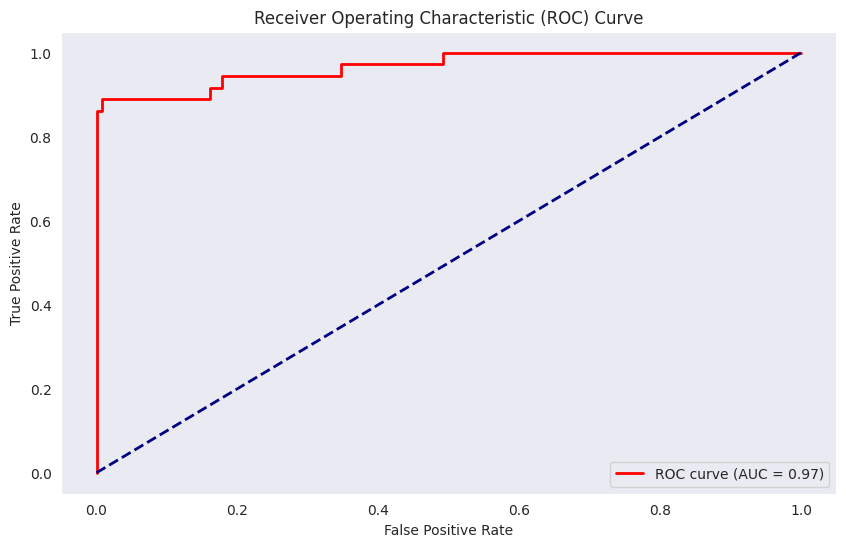

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, precision_recall_fscore_support

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Drop unnecessary columns
drop_cols = ["ID", "age_desc", "contry_of_res"]
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

# Convert categorical variables to numerical using Label Encoding
categorical_cols = ["gender", "ethnicity", "jaundice", "austim", "used_app_before", "relation"]
encoder = LabelEncoder()

# Apply label encoding consistently to train and test data
for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

# Define features (X) and target (y)
X = train_df.drop(columns=["Class/ASD"])
y = train_df["Class/ASD"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test_df.drop(columns=["Class/ASD"]))
y_test = test_df["Class/ASD"]

# Build the Deep Neural Network (DNN) model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(32, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(16, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

# Predict for the test dataset
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy_dnn = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy_dnn)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Precision, Recall, and F1-score
precision_dnn, recall_dnn, fscore_dnn, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"\nPrecision (DNN): {precision_dnn:.4f}")
print(f"Recall (DNN): {recall_dnn:.4f}")
print(f"F1-Score (DNN): {fscore_dnn:.4f}")

from sklearn.metrics import precision_recall_fscore_support as score
precision_dnn,recall_dnn,fscore_dnn,support_dnn=score(y_val, y_pred)
print(precision_dnn)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Comparison of ANN, Decision Tree, Randoom Forest, SVM,Multi SVM, Logistic Regression, Naive Bayes, KNN ,DNN


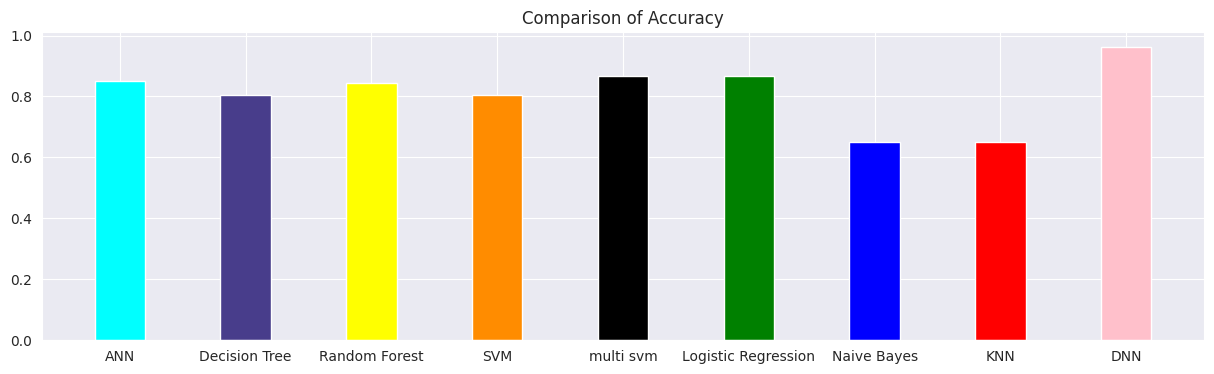

In [ ]:
#Comparison of Accuracy
fig, ax2 = plt.subplots(figsize = (15, 4))
ax2.bar(['ANN', 'Decision Tree', 'Random Forest', 'SVM','multi svm', 'Logistic Regression', 'Naive Bayes', 'KNN','DNN'], [accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm,accuracy_msvm, accuracy_logr, accuracy_gnb, accuracy_knn,accuracy_dnn], color=['cyan', 'darkslateblue', 'yellow', 'darkorange','black', 'green', 'blue', 'red','pink'], width = 0.4)

plt.title('Comparison of Accuracy')
plt.show()

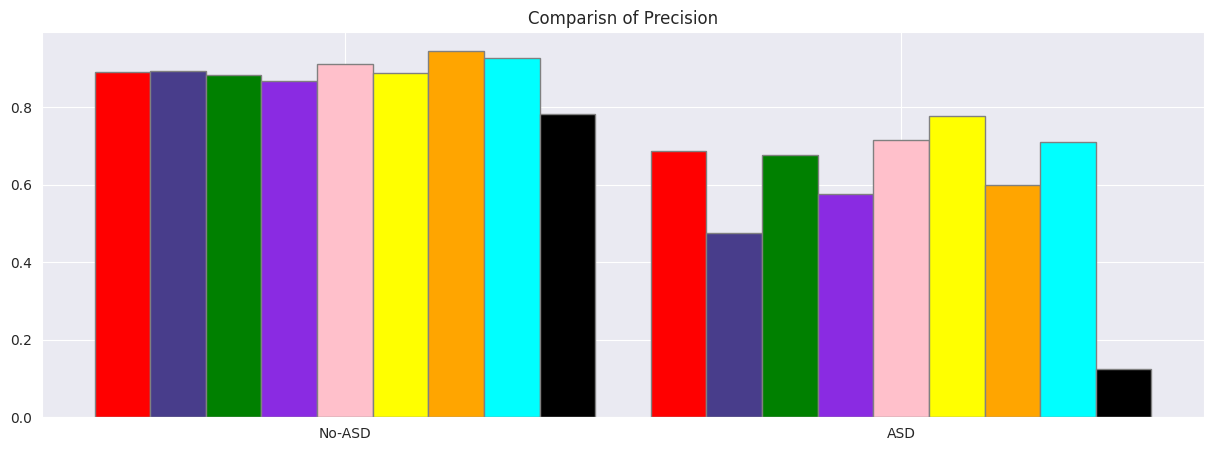

In [ ]:
#Comparison of Precision
barWidth = 0.1
fig = plt.subplots(figsize =(15, 5))

# Set position of bar on X axis
br1 = np.arange(len(precision_ANN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]



# Make the plot
plt.bar(br1, precision_ANN, color ='r', width = barWidth,
        edgecolor ='grey', label ='ANN')
plt.bar(br2, precision_dt, color ='darkslateblue', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')
plt.bar(br3, precision_rf, color ='g', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
plt.bar(br4, precision_svm, color ='blueviolet', width = barWidth,
        edgecolor ='grey', label = 'SVM')
plt.bar(br5, precision_msvm, color ='pink', width = barWidth,
        edgecolor ='grey', label = 'Multi SVM')
plt.bar(br6, precision_logr, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='Logistic Regression')
plt.bar(br7, precision_gnb, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Naive Bayes')
plt.bar(br8, precision_knn, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br9, precision_dnn, color ='black', width = barWidth,
        edgecolor ='grey', label = 'DNN')

# Adding Xticks
plt.title('Comparisn of Precision')
plt.xticks([r + 4*barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])

# plt.legend()
plt.show()

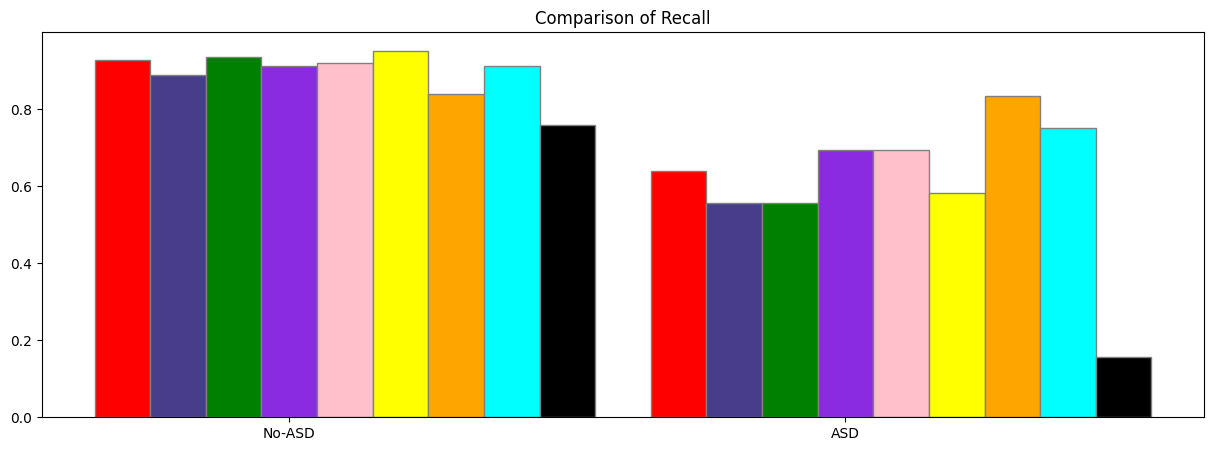

In [ ]:
#Comparison of Recall
barWidth = 0.1
fig = plt.subplots(figsize =(15, 5))

# Set position of bar on X axis
br1 = np.arange(len(recall_ANN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]

# Make the plot
plt.bar(br1, recall_ANN, color ='r', width = barWidth,
        edgecolor ='grey', label ='ANN')
plt.bar(br2, recall_dt, color ='darkslateblue', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')
plt.bar(br3, recall_rf, color ='g', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
plt.bar(br4, recall_svm, color ='blueviolet', width = barWidth,
        edgecolor ='grey', label = 'SVM')
plt.bar(br5, recall_msvm, color ='pink', width = barWidth,
        edgecolor ='grey', label = 'Multi SVM')
plt.bar(br6, recall_logr, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='Logistic Regression')
plt.bar(br7, recall_gnb, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Naive Bayes')
plt.bar(br8, recall_knn, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br9, recall_dnn, color ='black', width = barWidth,
        edgecolor ='grey', label = 'DNN')


# Adding Xticks
plt.title('Comparison of Recall')
plt.xticks([r + 3*barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])

# plt.legend()
plt.show()

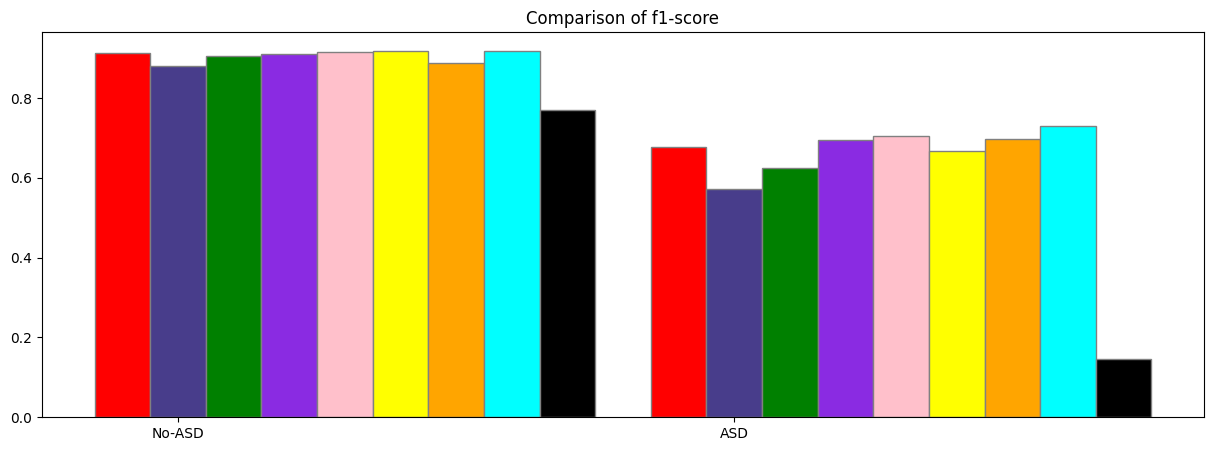

In [ ]:
#Comparison of fscore
barWidth = 0.1
fig = plt.subplots(figsize =(15, 5))

# Set position of bar on X axis
br1 = np.arange(len(fscore_ANN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]

# Make the plot
plt.bar(br1, fscore_ANN, color ='r', width = barWidth,
        edgecolor ='grey', label ='ANN')
plt.bar(br2, fscore_dt, color ='darkslateblue', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')
plt.bar(br3, fscore_rf, color ='g', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
plt.bar(br4, fscore_svm, color ='blueviolet', width = barWidth,
        edgecolor ='grey', label = 'SVM')
plt.bar(br5, fscore_msvm, color ='pink', width = barWidth,
        edgecolor ='grey', label = 'Multi SVM')
plt.bar(br6, fscore_logr, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='Logistic Regression')
plt.bar(br7, fscore_gnb, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Naive Bayes')
plt.bar(br8, fscore_knn, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br9, fscore_dnn, color ='black', width = barWidth,
        edgecolor ='grey', label = 'DNN')


# Adding Xticks
plt.title('Comparison of f1-score')
plt.xticks([r + barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])

# plt.legend()
plt.show()

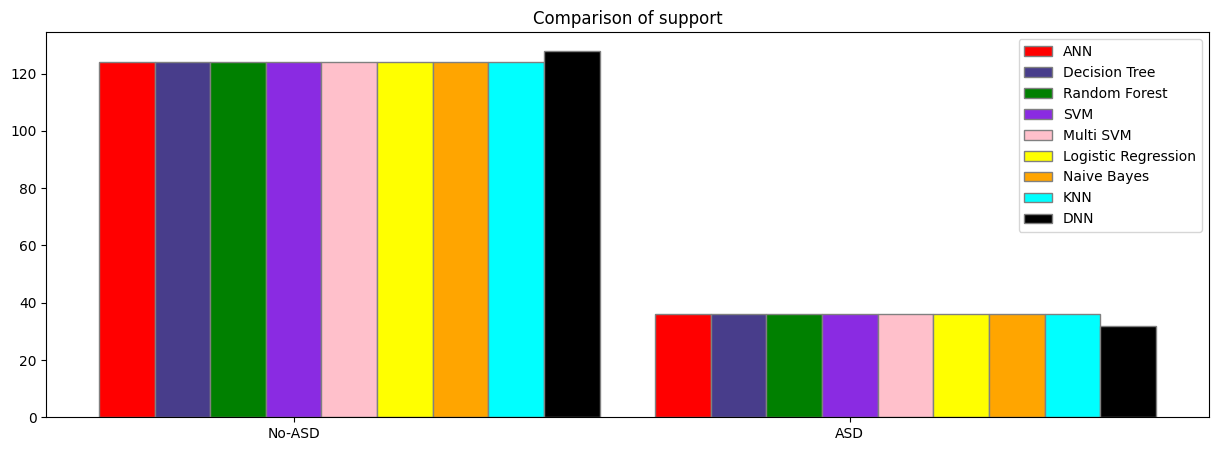

In [ ]:
#Comparison of support
barWidth = 0.1
fig = plt.subplots(figsize =(15, 5))

# Set position of bar on X axis
br1 = np.arange(len(support_ANN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]

# Make the plot
plt.bar(br1, support_ANN, color ='r', width = barWidth,
        edgecolor ='grey', label ='ANN')
plt.bar(br2, support_dt, color ='darkslateblue', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')
plt.bar(br3, support_rf, color ='g', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
plt.bar(br4, support_svm, color ='blueviolet', width = barWidth,
        edgecolor ='grey', label = 'SVM')
plt.bar(br5, support_msvm, color ='pink', width = barWidth,
        edgecolor ='grey', label = 'Multi SVM')
plt.bar(br6, support_logr, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='Logistic Regression')
plt.bar(br7, support_gnb, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Naive Bayes')
plt.bar(br8, support_knn, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br9,support_dnn, color ='black', width = barWidth,
        edgecolor ='grey', label = 'DNN')

# Adding Xticks
plt.title('Comparison of support')
plt.xticks([r + 3*barWidth for r in range(len(precision_ANN))], ['No-ASD', 'ASD'])

plt.legend()
plt.show()

## Machine Learning Algorithm Performance for ASD and Non ASD

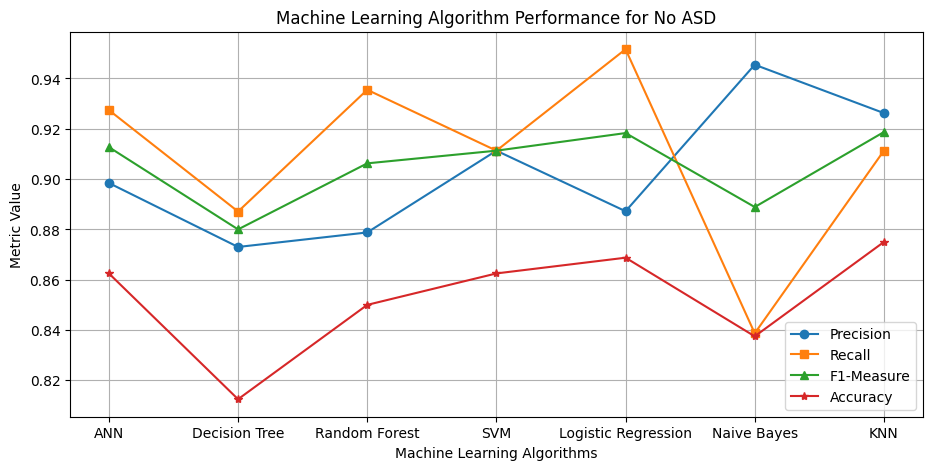

In [ ]:
plt.figure(figsize=(11, 5))
algorithms = ["ANN", "Decision Tree", "Random Forest", "SVM", "Logistic Regression", "Naive Bayes", "KNN"]

# Metric values (example data, replace with your actual values)
precision_ng = [precision_ANN[0], precision_dt[0], precision_rf[0], precision_svm[0], precision_logr[0], precision_gnb[0], precision_knn[0]]
recall_ng = [recall_ANN[0], recall_dt[0], recall_rf[0], recall_svm[0], recall_logr[0], recall_gnb[0], recall_knn[0]]
f1_measure_ng = [fscore_ANN[0], fscore_dt[0], fscore_rf[0], fscore_svm[0], fscore_logr[0], fscore_gnb[0], fscore_knn[0]]
accuracy_ng = [accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_logr, accuracy_gnb, accuracy_knn]

# Create multiple line plots
plt.plot(algorithms, precision_ng, label='Precision', marker='o')
plt.plot(algorithms, recall_ng, label='Recall', marker='s')
plt.plot(algorithms, f1_measure_ng, label='F1-Measure', marker='^')
plt.plot(algorithms, accuracy_ng, label='Accuracy', marker='*')

# Add labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Metric Value")
plt.title("Machine Learning Algorithm Performance for No ASD")

# Add legend
plt.legend()

# Grid for better readability (optional)
plt.grid(True)

# Show the plot
plt.show()

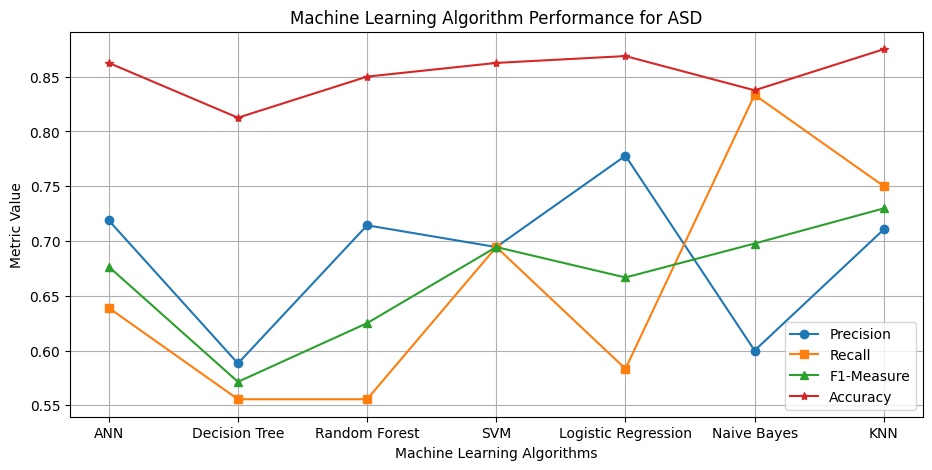

In [ ]:
plt.figure(figsize=(11, 5))
algorithms = ["ANN", "Decision Tree", "Random Forest", "SVM", "Logistic Regression", "Naive Bayes", "KNN"]

# Metric values (example data, replace with your actual values)
precision_ag = [precision_ANN[1], precision_dt[1], precision_rf[1], precision_svm[1], precision_logr[1], precision_gnb[1], precision_knn[1]]
recall_ag = [recall_ANN[1], recall_dt[1], recall_rf[1], recall_svm[1], recall_logr[1], recall_gnb[1], recall_knn[1]]
f1_measure_ag = [fscore_ANN[1], fscore_dt[1], fscore_rf[1], fscore_svm[1], fscore_logr[1], fscore_gnb[1], fscore_knn[1]]
accuracy_ag = [accuracy_ANN, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_logr, accuracy_gnb, accuracy_knn]

# Create multiple line plots
plt.plot(algorithms, precision_ag, label='Precision', marker='o')
plt.plot(algorithms, recall_ag, label='Recall', marker='s')
plt.plot(algorithms, f1_measure_ag, label='F1-Measure', marker='^')
plt.plot(algorithms, accuracy_ag, label='Accuracy', marker='*')

# Add labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Metric Value")
plt.title("Machine Learning Algorithm Performance for ASD")

# Add legend
plt.legend()

# Grid for better readability (optional)
plt.grid(True)

# Show the plot
plt.show()

## Feature Importance Ranking

PermutationExplainer explainer: 161it [00:28,  5.03it/s]


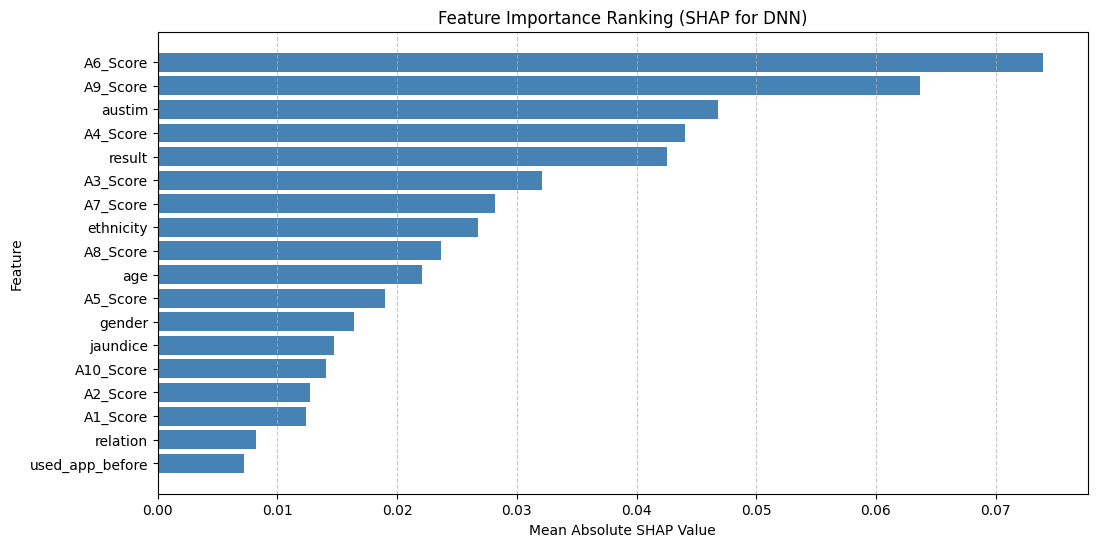

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(model, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Get the mean absolute SHAP values for feature importance ranking
feature_importance = np.abs(shap_values.values).mean(axis=0)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importance[sorted_indices]

# Plot feature importance as a bar chart
plt.figure(figsize=(12, 6))
plt.barh(sorted_features, sorted_importances, color='steelblue')
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.title("Feature Importance Ranking (SHAP for DNN)")
plt.gca().invert_yaxis()  # Flip for better readability
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()


## Model Performance Heatmap for Different Models

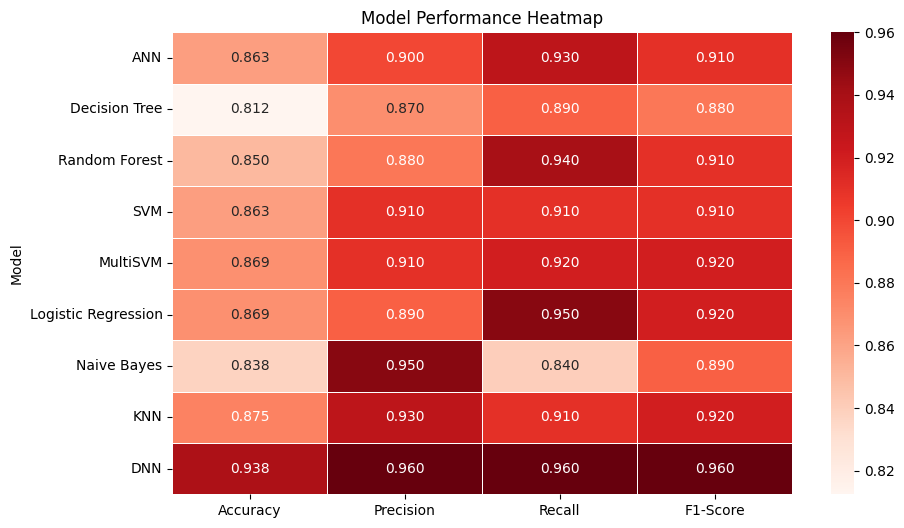

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example values (Replace these with actual extracted values)
data = {
    "Model": ["ANN", "Decision Tree", "Random Forest", "SVM", "MultiSVM", "Logistic Regression", "Naive Bayes", "KNN", "DNN"],
    "Accuracy": [0.8625, 0.8125, 0.85, 0.8625, 0.86875, 0.86875, 0.8375, 0.875, 0.9375],
    "Precision": [0.90, 0.87, 0.88, 0.91, 0.91, 0.89, 0.95, 0.93, 0.96],
    "Recall": [0.93, 0.89, 0.94, 0.91, 0.92, 0.95, 0.84, 0.91, 0.96],
    "F1-Score": [0.91, 0.88, 0.91, 0.91, 0.92, 0.92, 0.89, 0.92, 0.96]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set Model as index
df.set_index("Model", inplace=True)

# Generate Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="Reds", linewidths=0.5, fmt=".3f")

# Title
plt.title("Model Performance Heatmap")
plt.show()
